**Author: Ramazan Ali Bahrami**

# Session 7: Introduction to Unsupervised Learning: Clustering with k-Means
* Introduction 
* Clustering vs Classification 
* Types of Clustering
* k-Means algorithm
* Visualizing clusters
* Brief mention of dimensionality reduction (e.g., PCA)

# Introductory Extercise
**`categorize the following words`**: 
* Into 2 categories 
* Into 3 categories
* into 4 Categories
```python
L=[Berlin, Germany,Kabul,Bamyan, Pakistan, Spain, NewYork, USA, Melbourn]
```


<details>
  <summary>Click to Some Possible See Solutions</summary>

```python
Cities=[Berlin, Germany,Kabul,Bamyan, Pakistan, Spain, NewYork, USA, Melbourn]
Countries=[ Pakistan,USA]
#############################
In_Europe=[Berlin, Germany Spain]
In_Asia=[ Pakistan,Kabul,Bamyan]
In_Australia=[ Melbourn]
```
</details>


## The unsupervised Learning: Finding Pattern in the Data


<img src="files/images/unsupervised-vs-supervised.png" alt="My image" width="900"/>

source:https://www2.cs.arizona.edu/~pachecoj/courses/csc380_fall21/lectures



![Alt text](files/images/cls-vs-cl.png)


<img src="files/images/unsupervised-vs-supervised.png" alt="My image" width="900"/>

source:https://www2.cs.arizona.edu/~pachecoj/courses/csc380_fall21/lectures
source:https://www2.cs.arizona.edu/~pachecoj/courses/csc380_fall21/lectures

# Types of Clustering 
* centroid-based :` K means`
* density-based 
* distribution-based, 
* hierarchical

<details>
  <summary>Distribution Based</summary>

<figure>
<img src="files/images/Distribution.png" style="width:50%">
<figcaption align = "center"> Image from : https://www2.cs.arizona.edu/~pachecoj/courses/csc380_fall21/lectures </figcaption>
</figure>
```
</details>

<details>
  <summary>Density Based</summary>

<figure>
<img src="files/images/Density.png" style="width:50%">
<figcaption align = "center"> Image from :https://www2.cs.arizona.edu/~pachecoj/courses/csc380_fall21/lectures  </figcaption>
</figure>
```
</details>

<details>
  <summary>Hierarchical Based</summary>

<figure>
<img src="files/images/hierachical.png" style="width:50%">
<figcaption align = "center"> Image from :https://www2.cs.arizona.edu/~pachecoj/courses/csc380_fall21/lectures  </figcaption>
</figure>
```
</details>

# Centoroid Based: `K Means`



![Alt text](files/images/centroid.png)

# Algorithm and its implementations

**Algorithm: K-Means Clustering**

1. Initialize $k$ cluster centroids $\mu_1, \mu_2, \dots, \mu_k$ randomly.  
2. Repeat until convergence:  
   - For each point $x_i$, assign it to the nearest centroid:  
     $$
     c_i = \arg\min_j \; \|x_i - \mu_j\|
     $$
   - For each cluster $j = 1, \dots, k$, update centroid:  
     $$
     \mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
     $$

## Simple Exaple

In [157]:
import numpy as np

def generate_blobs(n_pairs=100, centers=[(-5, -5), (0, 0), (5, 5)], std=0.8):
    """
    Generate pairs of points from 3 Gaussian clusters.
    Returns: (X, y) where X = list of pairs, y = cluster labels
    """
    X, Y = [], []
    for i, center in enumerate(centers):
        pts = np.random.randn(n_pairs, 2) * std + np.array(center)
        for pt in pts:
            # make a pair by adding a small noise vector
     
            pair =  pt + np.random.normal(loc=center, scale=2, size=2)
   
            X.append(pair[0])
    
            Y.append(pair[1])
    return X, Y
    

300 300


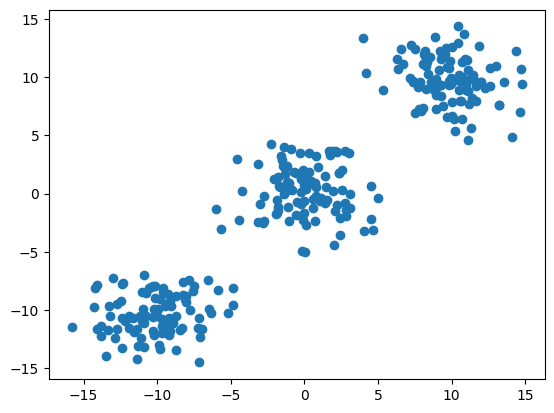

In [158]:
import matplotlib.pyplot as plt


X,Y=generate_blobs()
        
print(len(X),len(Y))

plt.scatter(X, Y)
plt.show()


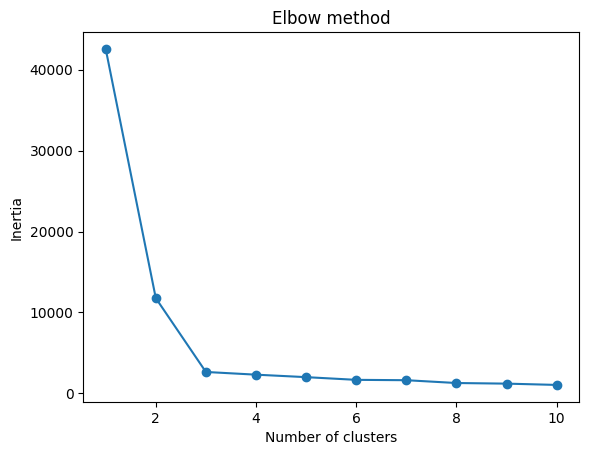

In [159]:
from sklearn.cluster import KMeans

data = list(zip(X, Y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

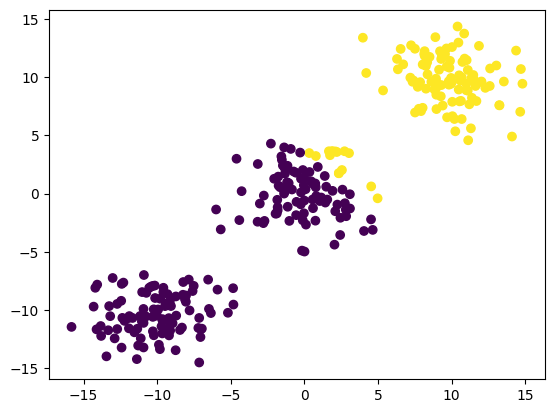

In [160]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(X, Y, c=kmeans.labels_)
plt.show()

# Another Example 

Source Data:
https://www.kaggle.com/datasets/simonezappatini/body-fat-extended-dataset


In [84]:
import pandas as pd

home_data = pd.read_csv('files/data/BodyFatExtended.csv')
home_data.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


<Axes: xlabel='BodyFat', ylabel='Weight'>

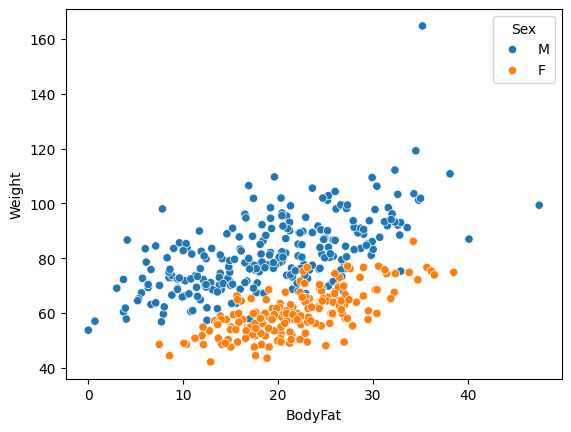

In [85]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'BodyFat', y = 'Weight', hue = 'Sex')

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['BodyFat', 'Weight']], home_data[['Sex']], test_size=0.33, random_state=0)

In [87]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [88]:

from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)



KMeans(n_clusters=4, random_state=0)

<Axes: xlabel='BodyFat', ylabel='Weight'>

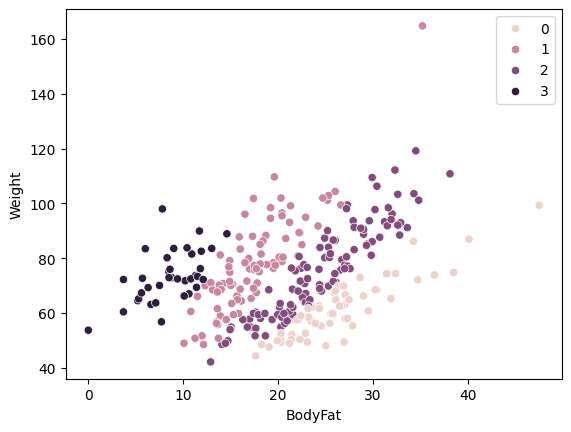

In [90]:
sns.scatterplot(data = X_train, x = 'BodyFat', y = 'Weight', hue = kmeans.labels_)

<Axes: ylabel='Sex'>

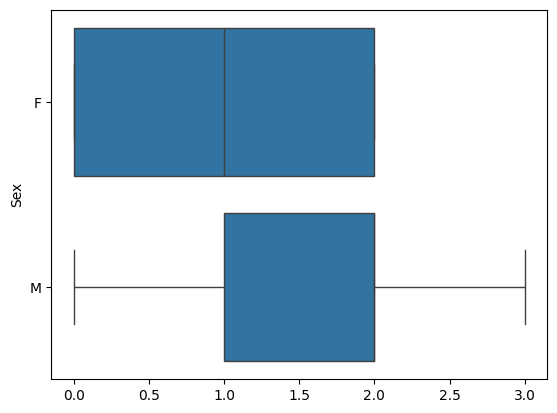

In [91]:
sns.boxplot(x = kmeans.labels_, y = y_train['Sex'])

In [92]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.5366157674352438

In [93]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='BodyFat', ylabel='Weight'>

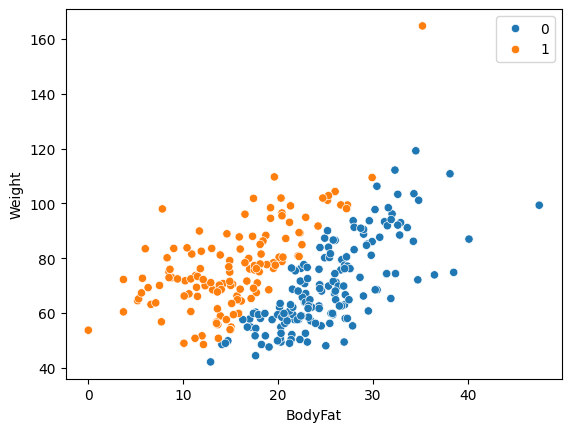

In [94]:
sns.scatterplot(data = X_train, x = 'BodyFat', y = 'Weight', hue = fits[0].labels_)

<Axes: xlabel='BodyFat', ylabel='Weight'>

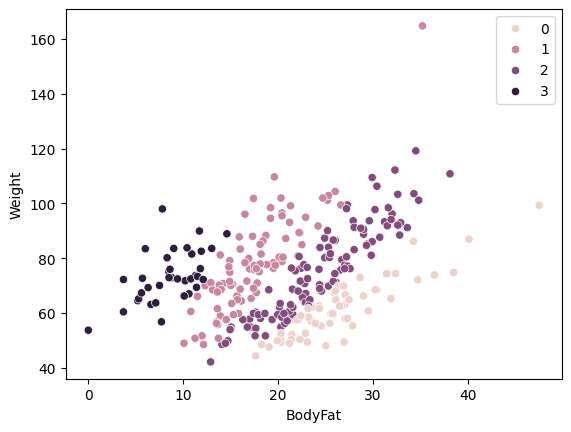

In [95]:
sns.scatterplot(data = X_train, x = 'BodyFat', y = 'Weight', hue = fits[2].labels_)

## Exercise


download data from: 
https://www.kaggle.com/datasets/fedesoriano/cern-electron-collision-data

In [96]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Content

*  Run: The run number of the event.
* Event: The event number.
* E1, E2: The total energy of the electron (GeV) for electrons 1 and 2.
*  px1,py1,pz1,px2,py2,pz2: The components of the momemtum of the electron 1 and 2 (GeV).
*  pt1, pt2: The transverse momentum of the electron 1 and 2 (GeV).
*  eta1, eta2: The pseudorapidity of the electron 1 and 2.
*  phi1, phi2: The phi angle of the electron 1 and 2 (rad).
*  Q1, Q2: The charge of the electron 1 and 2.
*  M: The invariant mass of two electrons (GeV).

`DO you think, given total Energies for Electrons E1, and E2, you can guess the range of their Invariant Mass M with some probability above 55%? Support your solution by visualizing the data.  `

`If the answer to the above question is yes, how many clusters could be appropriate? `


In [161]:
df= pd.read_csv("files/data/dielectron.csv")
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718
